In [ ]:
1.	Charger une image en niveaux de gris.
2.	Afficher l'image.


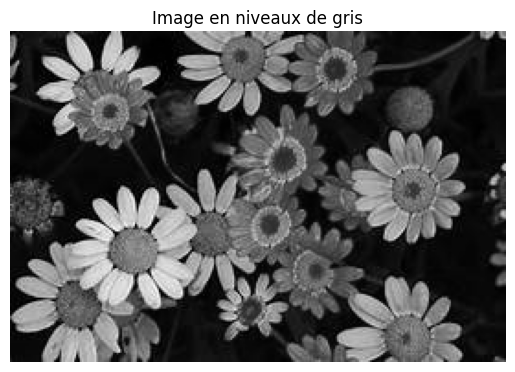

In [ ]:
!pip install opencv-python matplotlib
import cv2
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
# Charger l'image
chemin_image = '/content/flower.jpg'
image = Image.open(chemin_image)
image_gris = image.convert('L') # Convertir en niveaux de gris
# Convertir l'image en tableau NumPy
image_array = np.array(image_gris)

# Afficher l'image en niveaux de gris
plt.imshow(image_array, cmap='gray')
plt.title('Image en niveaux de gris')
plt.axis('off') # Masquer les axes
plt.show()


### Fourrier

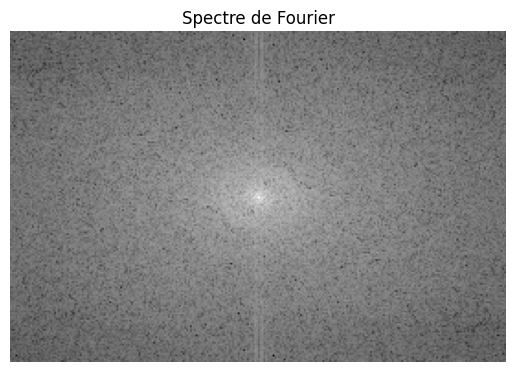

In [ ]:
# Transformation de Fourier
fourier_transform = np.fft.fft2(image_array)
# Centrer le spectre
fourier_transform_shifted = np.fft.fftshift(fourier_transform)
# Obtenir la magnitude du spectre
magnitude_spectrum = np.log(np.abs(fourier_transform_shifted) + 1)  # Pour la visualisation

# Afficher le spectre de Fourier
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Spectre de Fourier')
plt.axis('off')
plt.show()

### **Appliquation des filtres **

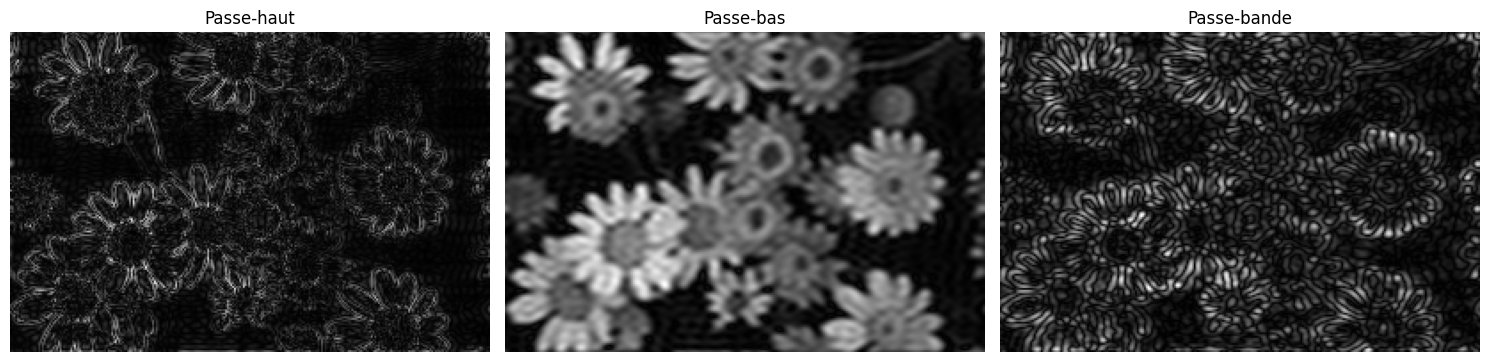

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Question 4 : Créer un masque de filtre passe-haut, passe-bas et passe-bande dans le domaine fréquentiel.

# Charger l'image
chemin_image = '/content/flower.jpg'
image = Image.open(chemin_image)
image_gris = image.convert('L')  # Convertir en niveaux de gris
# Convertir l'image en tableau NumPy
image_array = np.array(image_gris)

# Transformation de Fourier
fourier_transform = np.fft.fft2(image_array)
# Centrer le spectre
fourier_transform_shifted = np.fft.fftshift(fourier_transform)

# Dimensions de l'image
rows, cols = image_array.shape
crow, ccol = rows // 2, cols // 2

# Question 5 : Appliquer le masque sur l'image transformée.

# Appliquer un filtre passe-haut
mask_size_high = 30  # Taille du masque pour le filtre passe-haut
mask_high = np.ones((rows, cols), np.uint8)
mask_high[crow - mask_size_high:crow + mask_size_high, ccol - mask_size_high:ccol + mask_size_high] = 0

# Appliquer un filtre passe-bas
mask_size_low = 30  # Taille du masque pour le filtre passe-bas
mask_low = np.zeros((rows, cols), np.uint8)
mask_low[crow - mask_size_low:crow + mask_size_low, ccol - mask_size_low:ccol + mask_size_low] = 1

# Créer un masque pour le filtre passe-bande
freq_low = 20
freq_high = 50
mask_bandpass = np.zeros((rows, cols), np.uint8)
for i in range(rows):
    for j in range(cols):
        if freq_low < np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) < freq_high:
            mask_bandpass[i, j] = 1

# Appliquer les filtres en multipliant les masques avec le spectre
filtered_spectrum_high = fourier_transform_shifted * mask_high
filtered_spectrum_low = fourier_transform_shifted * mask_low
filtered_spectrum_bandpass = fourier_transform_shifted * mask_bandpass

# Question 6 : Effectuer la Transformée de Fourier inverse pour revenir dans le domaine spatial.

# Transformation inverse pour le filtre passe-haut
filtered_spectrum_shifted_high = np.fft.ifftshift(filtered_spectrum_high)
filtered_image_high = np.fft.ifft2(filtered_spectrum_shifted_high)
filtered_image_high = np.abs(filtered_image_high)

# Transformation inverse pour le filtre passe-bas
filtered_spectrum_shifted_low = np.fft.ifftshift(filtered_spectrum_low)
filtered_image_low = np.fft.ifft2(filtered_spectrum_shifted_low)
filtered_image_low = np.abs(filtered_image_low)

# Transformation inverse pour le filtre passe-bande
filtered_spectrum_shifted_bandpass = np.fft.ifftshift(filtered_spectrum_bandpass)
filtered_image_bandpass = np.fft.ifft2(filtered_spectrum_shifted_bandpass)
filtered_image_bandpass = np.abs(filtered_image_bandpass)

# Affichage des images filtrées côte à côte

# Afficher les résultats côte à côte
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(filtered_image_high, cmap='gray')
plt.title('Passe-haut')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_image_low, cmap='gray')
plt.title('Passe-bas')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image_bandpass, cmap='gray')
plt.title('Passe-bande')
plt.axis('off')

plt.tight_layout()
plt.show()
